In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [3]:
os.chdir("C:\\Users\\ADMIN\\Fingerprint_Recognition_GROUP8\\model")

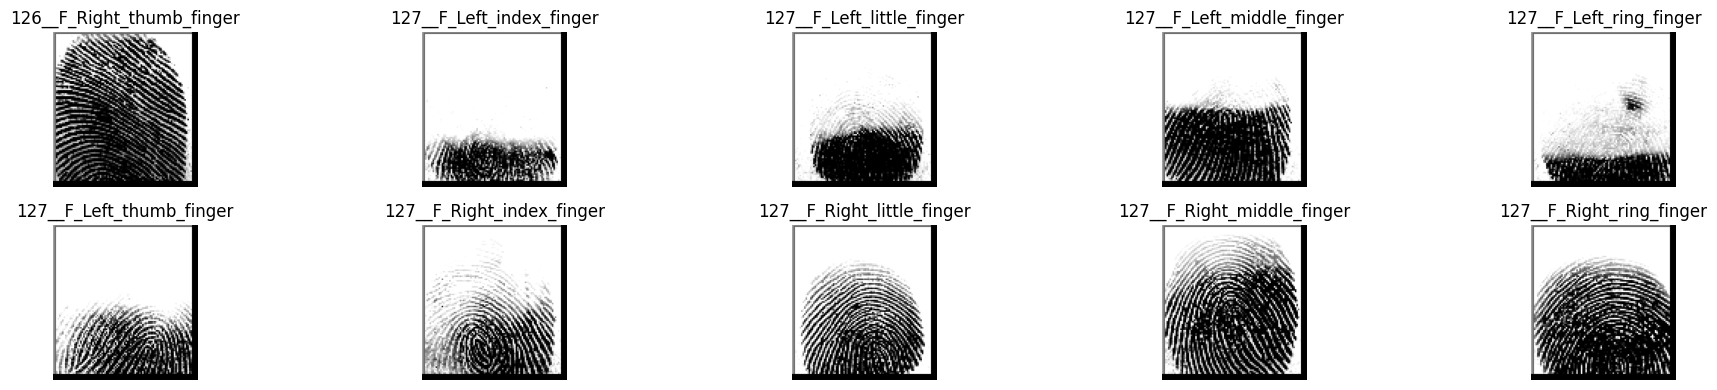

In [4]:
storage=[]
plt.figure(figsize=(20, 4))
i=1
for  file in os.listdir("SOCOFing\\Real")[289:299]:
    aaa = cv2.imread("SOCOFing\\Real\\"+ file)
    filee=file[:-4]
    a = cv2.cvtColor(aaa, cv2.COLOR_BGR2GRAY)
    storage.append(a)
    
    plt.subplot(2, 5, i)  
    i+=1
    plt.imshow(a, cmap="gray")
    plt.title(filee) 
    plt.axis("off")

plt.tight_layout()
plt.show(block=True)

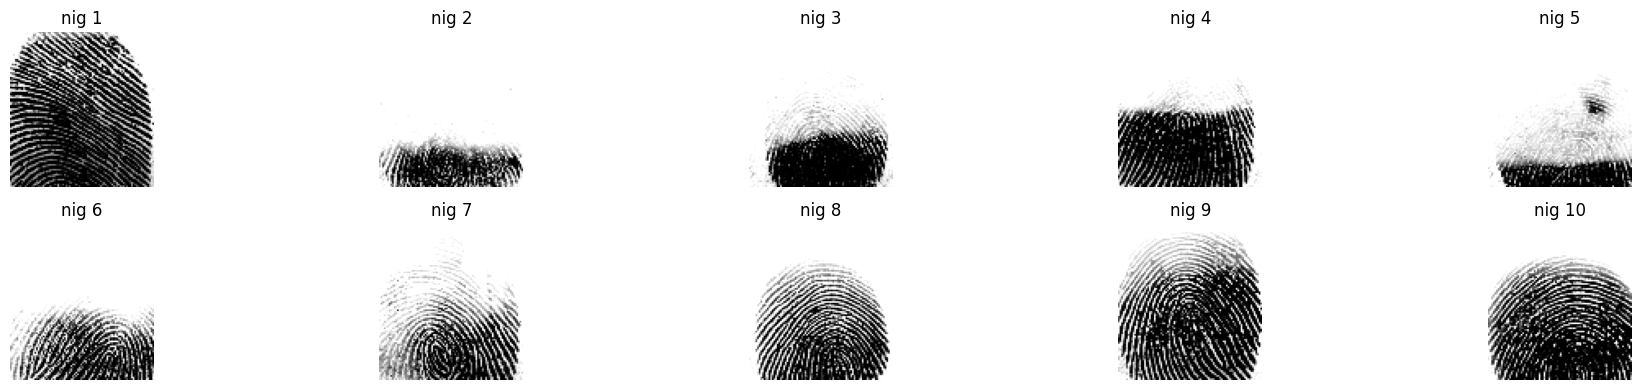

In [6]:
def remove_border(image, crop_pixels):
    # Load the image
    #image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply a binary threshold to separate the fingerprint from the background
    _, thresh = cv2.threshold(image, 10, 255, cv2.THRESH_BINARY)
    
    # Find contours of the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # If no contours are found, return the original image
    if not contours:
        return image
    
    # Find the bounding rectangle of the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Adjust the coordinates to crop the specified number of pixels from the border
    x = max(x + crop_pixels, 0)  # Ensure x does not go negative
    y = max(y + crop_pixels, 0)  # Ensure y does not go negative
    w = max(w - 2 * crop_pixels, 0)  # Reduce width
    h = max(h - 2 * crop_pixels, 0)  # Reduce height
    
    # Crop the image to the adjusted bounding rectangle
    cropped_image = image[y:y+h, x:x+w]
    
    return cropped_image
plt.figure(figsize=(20, 4))
i=1
for  file in storage:
    
    storage[i-1] = remove_border(file,2)

    
    plt.subplot(2, 5, i)  
    
    plt.imshow(storage[i-1] , cmap="gray")
    plt.title(f"nig {i}") 
    plt.axis("off")
    i+=1

plt.tight_layout()
plt.show(block=True)


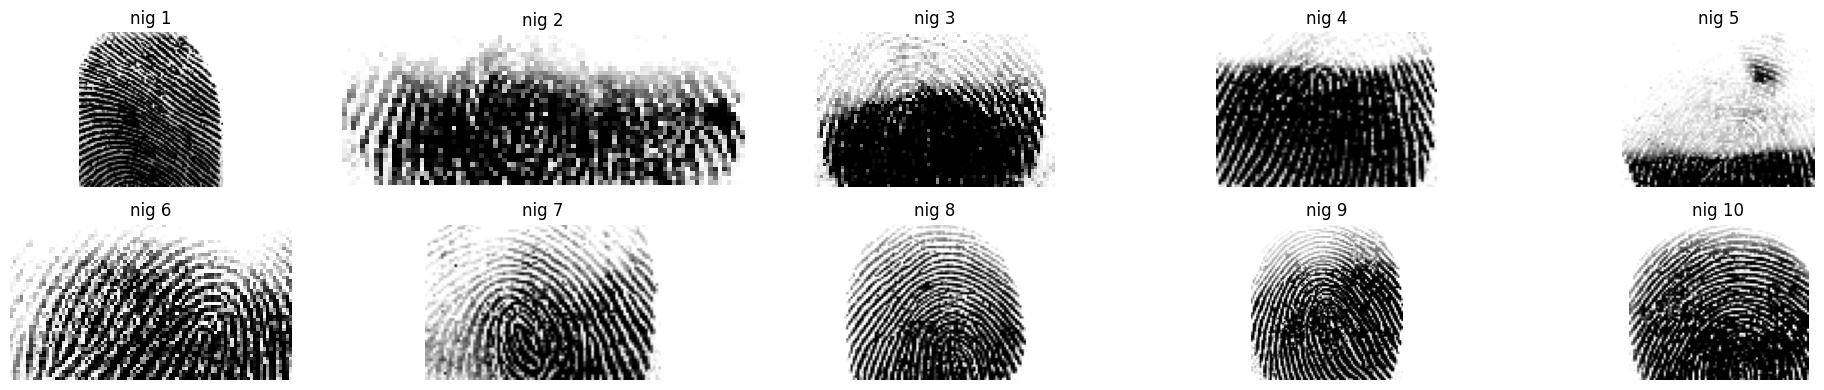

In [7]:
def crop_based_on_intensity(image, threshold=240):
    # Convert to grayscale if necessary
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) > 2 else image

    # Threshold the background
    _, mask = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY_INV)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        # Get the bounding box of the largest contour
        x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
        cropped_image = image[y:y+h, x:x+w]
        return cropped_image
    return image
plt.figure(figsize=(20, 4))
i=1
for  file in storage:
    
    storage[i-1] = crop_based_on_intensity(file)

    
    plt.subplot(2, 5, i)  
    
    plt.imshow(storage[i-1] , cmap="gray")
    plt.title(f"nig {i}") 
    plt.axis("off")
    i+=1

plt.tight_layout()
plt.show(block=True)


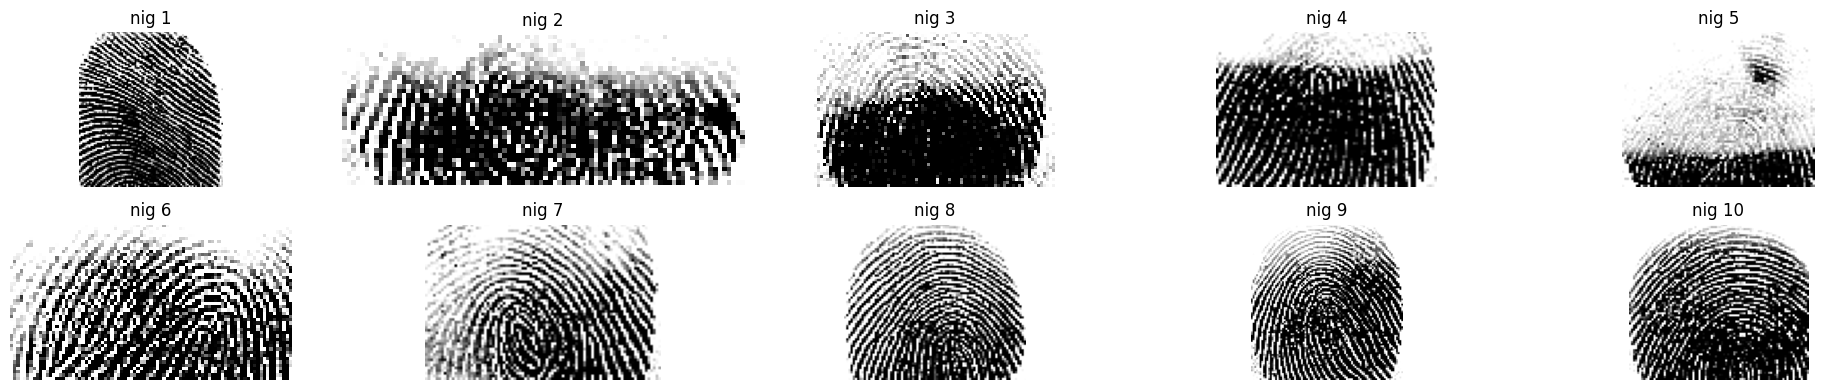

In [8]:
def unsharp_mask(img, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):
    """Applies unsharp masking to an image.

    Args:
        img: Input image.
        kernel_size: Kernel size for Gaussian blur.
        sigma: Standard deviation for Gaussian blur.
        amount: Strength of the unsharp masking effect.
        threshold: Threshold for applying the unsharp masking effect.

    Returns:
        Unsharp masked image.
    """

    blurred = cv2.GaussianBlur(img, kernel_size, sigma)
    sharpened = float(amount + 1) * img - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)

    if threshold > 0:
        mask = np.abs(img - blurred) >= threshold
        sharpened = np.where(mask, sharpened, img)

    return sharpened

plt.figure(figsize=(20, 4))
i=1
for  file in storage:
    
    storage[i-1] = unsharp_mask(file)

    
    plt.subplot(2, 5, i)  
    
    plt.imshow(storage[i-1] , cmap="gray")
    plt.title(f"nig {i}") 
    plt.axis("off")
    i+=1

plt.tight_layout()
plt.show(block=True)


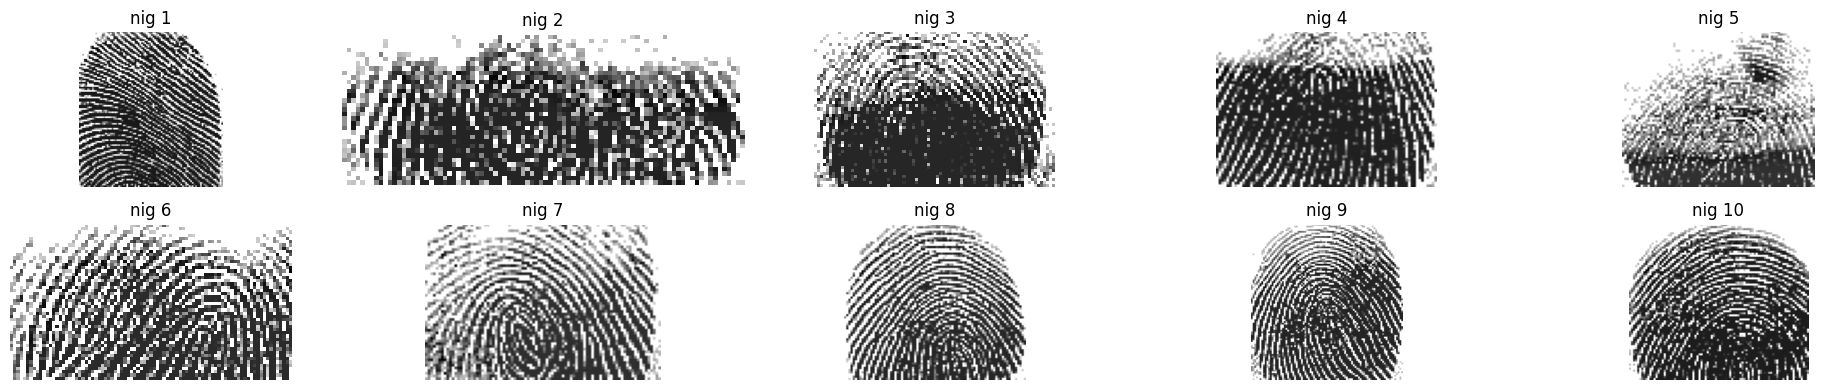

In [9]:

plt.figure(figsize=(20, 4))
i=1
for  file in storage:
    
    clahe = cv2.createCLAHE(clipLimit=50.0)
    storage[i-1] = clahe.apply(file)

    
    plt.subplot(2, 5, i)  
    
    plt.imshow(storage[i-1] , cmap="gray")
    plt.title(f"nig {i}") 
    plt.axis("off")
    i+=1

plt.tight_layout()
plt.show(block=True)

In [22]:
plt.figure(figsize=(20, 4))
i=1
for  file in storage:
    thinned = cv2.ximgproc.thinning(cv2.cvtColor(file, cv2.COLOR_RGB2GRAY))
    
    
    plt.subplot(2, 5, i)  
    
    plt.imshow(thinned , cmap="gray")
    plt.title(f"nig {i}") 
    plt.axis("off")
    i+=1

plt.tight_layout()
plt.show(block=True)

AttributeError: module 'cv2' has no attribute 'ximgproc'

<Figure size 2000x400 with 0 Axes>

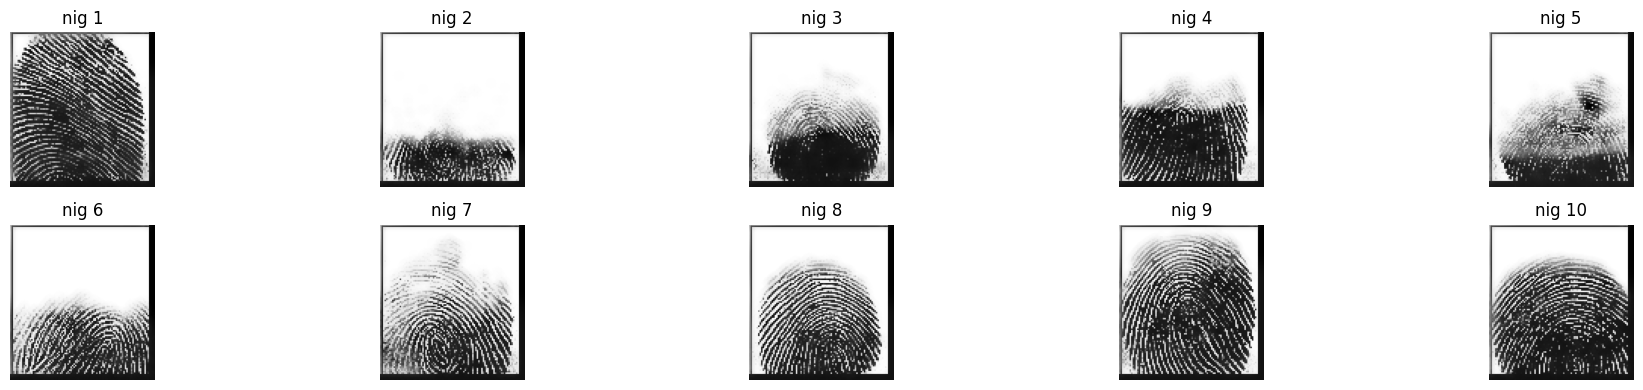

In [13]:
plt.figure(figsize=(20, 4))
i=1
for  file in storage:
    #storage[i-1]=255-storage[i-1]
    #storage[i-1] = cv2.Canny(file, 5, 100)
    storage[i-1] = cv2.bilateralFilter(file, 9, 75, 75)
    #blurred = cv2.GaussianBlur(file, (3, 3), sigmaX=7/8)
    
    
    plt.subplot(2, 5, i)  
    
    plt.imshow(storage[i-1] , cmap="gray")
    plt.title(f"nig {i}") 
    plt.axis("off")
    i+=1

plt.tight_layout()
plt.show(block=True)

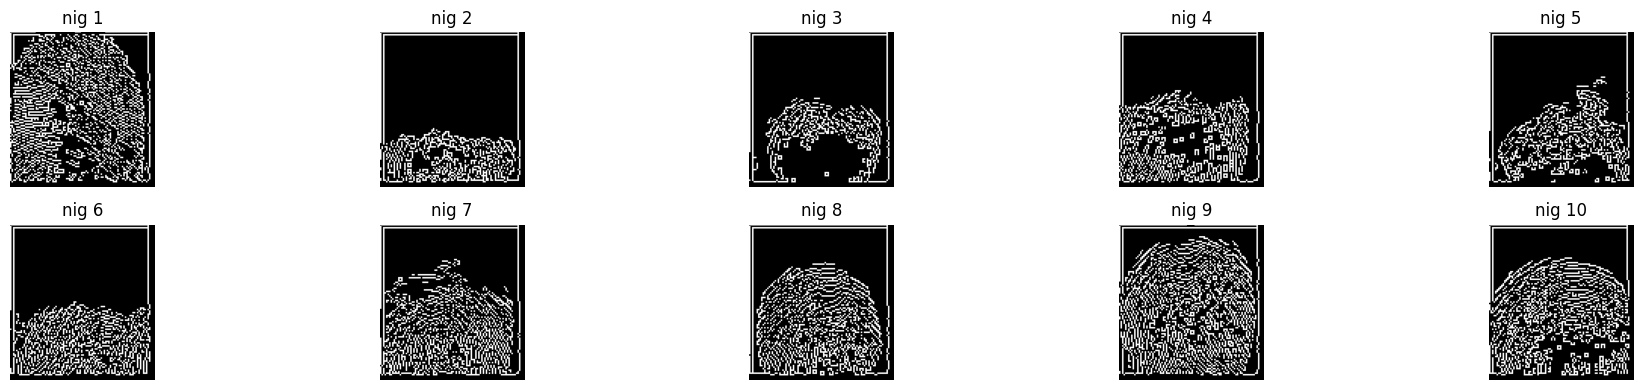

In [15]:
plt.figure(figsize=(20, 4))
i=1
for  file in storage:
    #storage[i-1]=255-storage[i-1]
    #storage[i-1] = cv2.Canny(file, 5, 100)
    #blurred = cv2.GaussianBlur(file, (3, 3), sigmaX=7/8)
    storage[i-1] = cv2.Canny(file, 170, 240)
    
    plt.subplot(2, 5, i)  
    
    plt.imshow(storage[i-1] , cmap="gray")
    plt.title(f"nig {i}") 
    plt.axis("off")
    i+=1

plt.tight_layout()
plt.show(block=True)

<Axes: title={'center': 'distribution'}, ylabel='Frequency'>

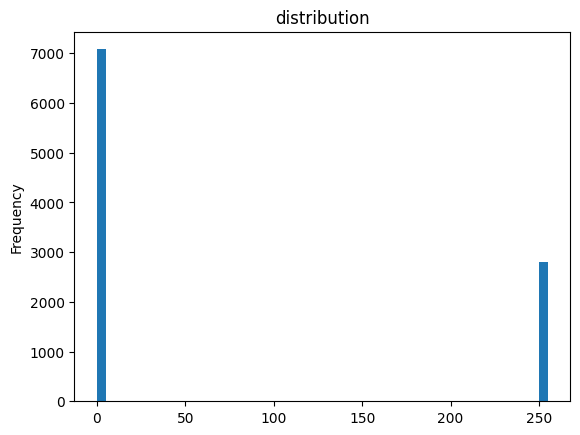

In [16]:
pd.Series(storage[0].flatten()).plot(kind='hist',bins=50, title="distribution")

(< cv2.KeyPoint 000001E285A0A100>, < cv2.KeyPoint 000001E285A0A4F0>, < cv2.KeyPoint 000001E285A0A3A0>, < cv2.KeyPoint 000001E285A08C90>, < cv2.KeyPoint 000001E28509B810>, < cv2.KeyPoint 000001E28509A520>, < cv2.KeyPoint 000001E28509A010>, < cv2.KeyPoint 000001E28509AD90>, < cv2.KeyPoint 000001E2850986C0>, < cv2.KeyPoint 000001E285098A20>, < cv2.KeyPoint 000001E285098EA0>, < cv2.KeyPoint 000001E285098900>, < cv2.KeyPoint 000001E285099140>, < cv2.KeyPoint 000001E28509A670>, < cv2.KeyPoint 000001E285099260>, < cv2.KeyPoint 000001E285099A70>, < cv2.KeyPoint 000001E285098DE0>, < cv2.KeyPoint 000001E285099F20>, < cv2.KeyPoint 000001E28509AB80>, < cv2.KeyPoint 000001E285099710>, < cv2.KeyPoint 000001E28509B0C0>, < cv2.KeyPoint 000001E285099B00>, < cv2.KeyPoint 000001E2850996B0>, < cv2.KeyPoint 000001E2850998C0>, < cv2.KeyPoint 000001E28509ABB0>, < cv2.KeyPoint 000001E28509ACA0>, < cv2.KeyPoint 000001E285099170>, < cv2.KeyPoint 000001E285099A40>, < cv2.KeyPoint 000001E28509BF30>, < cv2.KeyPoin

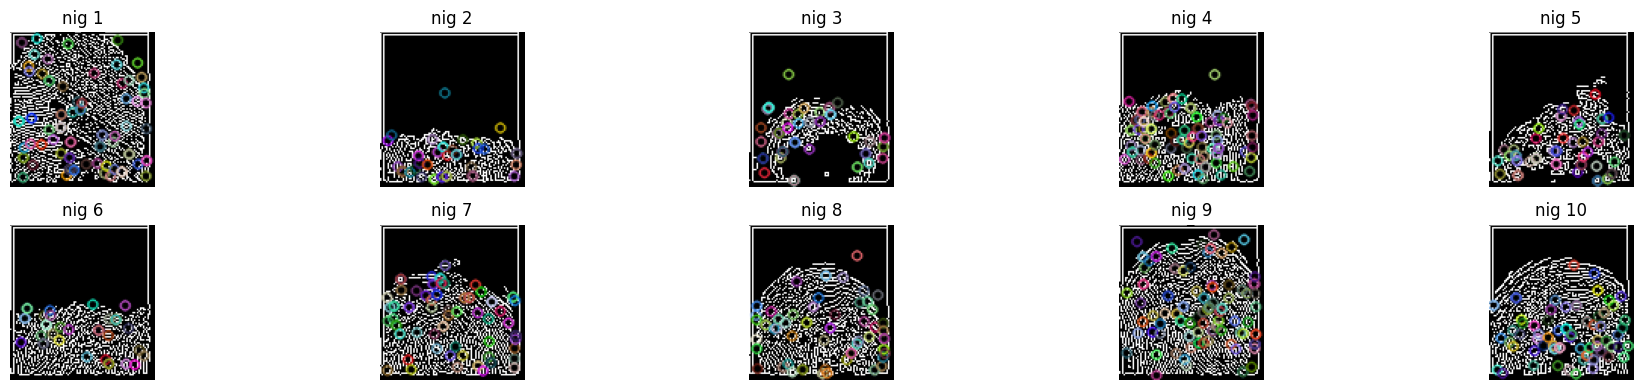

In [50]:
#vẽ thử
plt.figure(figsize=(20, 4))
i=1
for  file in storage:
    # Tạo detector SIFT
    sift = cv2.SIFT_create()
    #file-255-file
    # Tìm các keypoints và descriptors
    kp, des = sift.detectAndCompute(file,None)
    #storage[i-1] = (file - np.mean(file)) / np.std(file)
    img_with_keypoints = None
    img_with_keypoints = cv2.drawKeypoints(file,kp,img_with_keypoints)
    #img_with_keypoints=img_with_keypoints-file
    print(kp)
    plt.subplot(2, 5, i)
    plt.imshow(img_with_keypoints, cmap="gray")
    plt.title(f"nig {i}") 
    plt.axis("off")
    i+=1

plt.tight_layout()
plt.show(block=True)

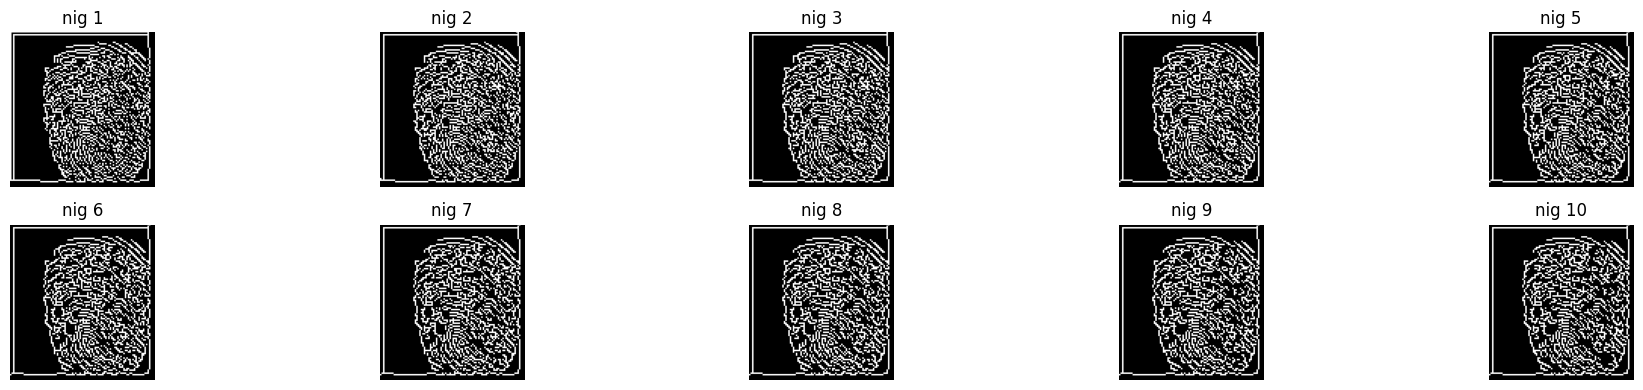

In [125]:
plt.figure(figsize=(20, 4))
#i=1
for  i in range(1,11):
    #storage[i-1]=255-storage[i-1]
    #storage[i-1] = cv2.Canny(file, 5, 100)
    #skib = cv2.Canny(storage[6], 150*i, 120*i)
    blurred = cv2.GaussianBlur(storage[6], (5, 5), sigmaX=7/8)  # Thay đổi sigmaX
    edges = cv2.Canny(blurred, 170, 240)

    plt.subplot(2, 5, i)  
    
    plt.imshow(edges , cmap="gray")
    plt.title(f"nig {i}") 
    plt.axis("off")
    i+=1

plt.tight_layout()
plt.show(block=True)